In [1]:
# Imports all packages necessary or useful

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn import tree

In [2]:
# Opens our medical_clean data csv file for analysis

df = pd.read_csv(r"C:\Users\caleb\OneDrive\Desktop\WGU\medical_clean.csv")

In [3]:
# Profiles our csv file following importing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Displays column names in our dataset for easy copying and pasting

df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [5]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [6]:
# Remaps our 'ReAdmis' values from no/yes to 0/1 to allow for math functions

df['ReAdmis'] = df['ReAdmis'].map({'No' : 0,'Yes' : 1})
df['ReAdmis']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: ReAdmis, Length: 10000, dtype: int64

In [7]:
# Provides descriptive statistics for our dependent variable

df['ReAdmis'].describe()

count    10000.000000
mean         0.366900
std          0.481983
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ReAdmis, dtype: float64

In [8]:
# Explores 'Gender' prior to remapping

df['Gender'].unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

In [9]:
# Remaps and recasts our 'Gender' values from 'Male' to 0, 'Female' to 1, and 'Nonbinary' to 2 to allow for math functions

df['Gender'].astype(str)
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1, 'Nonbinary' : 2})
df['Gender'].astype(int)
df['Gender']

0       0
1       1
2       1
3       0
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

In [10]:
# Explores distribution of genders in our data set

df['Gender'].value_counts()

1    5018
0    4768
2     214
Name: Gender, dtype: int64

In [11]:
# Remaps our 'HighBlood' values from no/yes to 0/1 to allow for math functions

df['HighBlood'] = df['HighBlood'].map({'No' : 0,'Yes' : 1})
df['HighBlood']

0       1
1       1
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    0
9999    0
Name: HighBlood, Length: 10000, dtype: int64

In [12]:
# Remaps our 'Stroke' values from no/yes to 0/1 to allow for math functions

df['Stroke'] = df['Stroke'].map({'No' : 0,'Yes' : 1})
df['Stroke']

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Stroke, Length: 10000, dtype: int64

In [13]:
# Remaps our 'Overweight' values from no/yes to 0/1 to allow for math functions

df['Overweight'] = df['Overweight'].map({'No' : 0,'Yes' : 1})
df['Overweight']

0       0
1       1
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: Overweight, Length: 10000, dtype: int64

In [14]:
# Remaps our 'Diabetes' values from no/yes to 0/1 to allow for math functions

df['Diabetes'] = df['Diabetes'].map({'No' : 0,'Yes' : 1})
df['Diabetes']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: Diabetes, Length: 10000, dtype: int64

In [15]:
# Remaps our 'Hyperlipidemia' values from no/yes to 0/1 to allow for math functions

df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'No' : 0,'Yes' : 1})
df['Hyperlipidemia']

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: Hyperlipidemia, Length: 10000, dtype: int64

In [16]:
# Remaps our 'BackPain' values from no/yes to 0/1 to allow for math functions

df['BackPain'] = df['BackPain'].map({'No' : 0,'Yes' : 1})
df['BackPain']

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: BackPain, Length: 10000, dtype: int64

In [17]:
# Remaps our 'Anxiety' values from no/yes to 0/1 to allow for math functions

df['Anxiety'] = df['Anxiety'].map({'No' : 0,'Yes' : 1})
df['Anxiety']

0       1
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    1
9998    0
9999    0
Name: Anxiety, Length: 10000, dtype: int64

In [18]:
# Creates a new working dataframe including only variables we are interested in for our classification model

new_df = df[['Age', 'Income', 'Gender', 'ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Initial_days']]
new_df

,Age,Income,Gender,ReAdmis,HighBlood,Stroke,Overweight,Diabetes,Hyperlipidemia,BackPain,Anxiety,Initial_days
0,53,86575.93,0,0,1,0,0,1,0,1,1,10.585770
1,51,46805.99,1,0,1,0,1,0,0,0,0,15.129562
2,53,14370.14,1,0,1,0,1,1,0,0,0,4.772177
3,78,39741.49,0,0,0,1,0,0,0,0,0,1.714879
4,22,1209.56,1,0,0,0,0,0,1,0,0,1.254807
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,45967.61,0,0,1,0,0,0,0,0,1,51.561220
9996,87,14983.02,0,1,1,0,1,1,0,0,0,68.668240
9997,45,65917.81,1,1,1,0,1,0,0,0,1,70.154180
9998,43,29702.32,0,1,0,0,1,0,0,1,0,63.356900


In [19]:
# # Displays new column names in our dataset for easy copying and pasting

new_df.columns

Index(['Age', 'Income', 'Gender', 'ReAdmis', 'HighBlood', 'Stroke',
       'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Initial_days'],
      dtype='object')

In [20]:
# Splits our data, where 'y' is our dependent/target variable and 'X' represents variables contributing to 'y'

y = new_df['ReAdmis'].copy()
X = new_df.drop('ReAdmis', axis=1)

In [21]:
# Trains the model on 80% of the data, tests the model on 20% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=8, stratify=y)
print(X_train.shape, X_test.shape)

(8000, 11) (2000, 11)


In [22]:
# Fits our model

rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [23]:
# Describes importance of feature by index location
# Implies 'Initial_days' is the most important feature in the dataset

feature_imp = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending=False)
feature_imp

Initial_days      0.689403
Income            0.105358
Age               0.078258
Overweight        0.023729
BackPain          0.021518
Gender            0.019421
Stroke            0.018095
Anxiety           0.014371
HighBlood         0.011100
Diabetes          0.010869
Hyperlipidemia    0.007878
dtype: float64

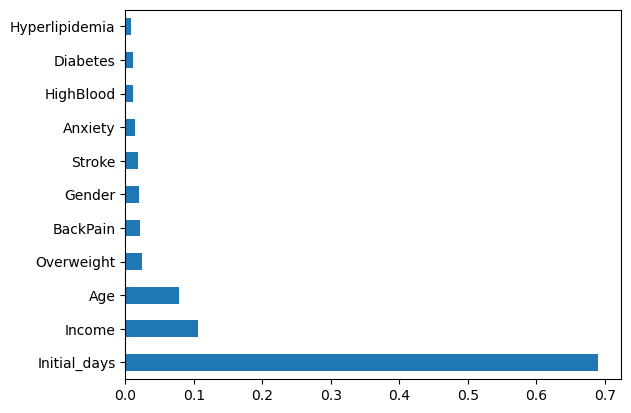

In [24]:
# Visualizes feature importance

feature_imp.plot(kind='barh')
plt.show()

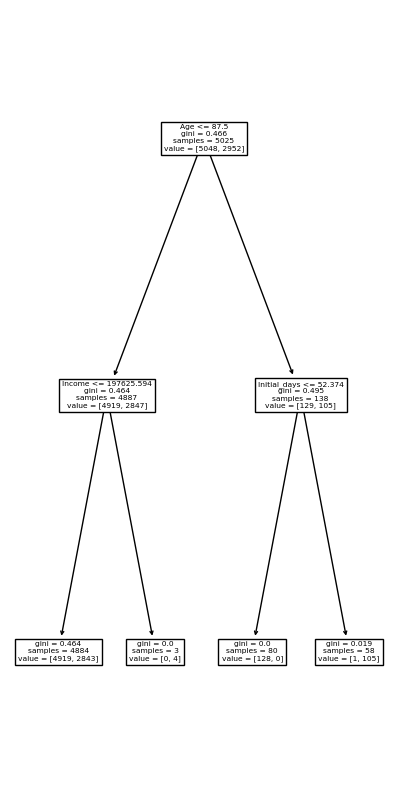

In [25]:
# Visualizes our random forest

rf.estimators_
plt.figure(figsize = (5, 10))
tree.plot_tree(rf.estimators_[0], feature_names = list(X.columns))
plt.show()

In [26]:
# Assigns a predictive function to our set of independent variables for accuracy scoring

y_pred = rf.predict(X_test)

In [27]:
# Prints an accuracy score for our algorithm

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9755

In [28]:
# Prints a classification report score including precision, recall, f1-score, and support

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1266
           1       0.96      0.97      0.97       734

    accuracy                           0.98      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000



In [29]:
# Creates a confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[1240,   26],
       [  23,  711]], dtype=int64)

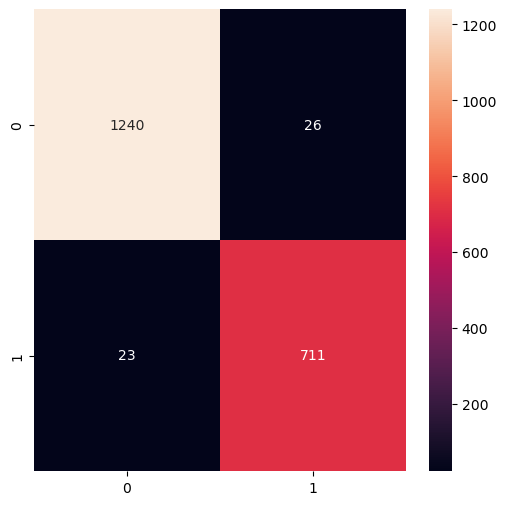

In [30]:
# Visualizes our confusion matrix, where the columns are model-predicted values and the rows are actual values
# Out of 2000 items classified, we appreciate 1240 true negatives, 23 false negatives, 26 false positives, and 711 true positives

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cf_matrix, annot = True, fmt = 'g')
plt.show()